<center>

# FARMING IN CANADA
    
</center>
<center>

### By Joseph S. Lubinda

</center>
<hr>
<center>28/01/2021</center>
<hr>


For easier navigation in this project file, please run all cells first and once done, use the table of contents. If the Links are non-responsive, note how the sections are grouped and scroll down to the appropriate section in this file.

### Table of Contents 
1. [Home (The Top)](#the_top)
2. [SECTION A](#sectionA)
    1. [Install Missing Libraries](#install_libraries)
    2. [Import Libraries](#import_libraries)
    3. [Web Scraping](#scrap_webpage_and_create_dataframe)
3. [SECTION B](#sectionB)
    1. [Population Comparison Bar Chart](#population_chart)
    2. [Farm Size Comparison Bar Chart](#farmland_size_chart)
    3. [Farm Count Comparison Bar Chart](#farm_count_chart)
    4. [Farm Income Comparison Bar Chart](#farm_income_chart)
4. [SECTION C](#sectionC)
    1. [Saskatchewan Cities](#saskatchewan_cities)
    2. [Set Four Square Details](#four_square_details)
    3. [Create getNeighborhoods Function](#get_neighborhoods_function)
    5. [Get Nearby Venues](#get_neighborhoods)
    6. [Count the Venue Categories](#count_venue_categories)
    7. [Observations](#observation)
        1. [More details on the Observations](#observation2)
        2. [Top 10 Most Common Venues](#top_ten_most_common_venues)
    8. [Add Cluster Labels to DatFrame](#add_cluster_labels_to_dataframe)
    9. [View Map with Clusters Labels](#view_clusters_on_map)
    10. [View Venues in Each Cluster](#view_venues_in_clusters)
5. [CONCLUSION](#conclusion) 
 

### SECTION A
<a id='sectionA'></a>

First we install Folium and Geocoder:
<a id='install_libraries'></a>

In [1]:
!pip3 install folium==0.5.0
!pip3 install geocoder

Then we import all the libraries we will use:
<a id='import_libraries'></a>

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# import k-means from clustering stage
from sklearn.cluster import KMeans 

import geocoder # module to convert an address into latitude and longitude values  Nominatim

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import folium # plotting library
import lxml.html as LH # import html to json converter library
from bs4 import BeautifulSoup # for extracting urls from web page

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import math

def text(elt):
    return elt.text_content().replace(u'\xa0', u' ')

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


Import Matplotlib:

In [3]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.3


We get the Number of Census Farms, Canada and the Provinces, 1996, 2001, 2006, 2011 and 2016 from the Web Page __http://www.omafra.gov.on.ca/english/stats/census/number.htm__ and load the data into a Pandas Dataframe:
<a id='scrap_webpage_and_create_dataframe'></a>

In [4]:
farmsDataUrl = 'http://www.omafra.gov.on.ca/english/stats/census/number.htm'

# Make a GET request to fetch the raw HTML content
html_content = requests.get(farmsDataUrl).text

# Parse the html content
soup = BeautifulSoup(html_content, "lxml")

gdp_table = soup.find("table", attrs={"class": "tableBorder1Px width598Px"})
gdp_table_data = gdp_table.find_all("tr")  # contains 2 rows

# Get all the headings of Lists
headings = []
for th in gdp_table_data[0].find_all("th"):
    # remove any newlines and extra spaces from left and right
    headings.append(th.text.replace('\n', ' ').strip())
tbl_data = []
#tbl_data.append(headings)
for a in range(1, len(gdp_table_data)-1):
    # Get all the headings of Lists
    tbl_list = []
    for td1 in gdp_table_data[a].find_all("th"):
        # remove any newlines and extra spaces from left and right
    
        tbl_list.append(td1.div.text.replace('\n', ' ').strip())
        
    for td in gdp_table_data[a].find_all("td"):
        # remove any newlines and extra spaces from left and right
        col = td.div.text.replace('\n', ' ').strip()  
        try:
            tbl_list.append(float(col.replace(',', '')))
        except:
            tbl_list.append(col)
    
    tbl_data.append(tbl_list)

farms_in_provinces_df = pd.DataFrame(tbl_data)
farms_in_provinces_df.columns = headings
farms_in_provinces_df

,Province,1996,2001,2006,2011,2016
0,Newfoundland,742.0,643.0,558.0,510.0,407.0
1,Prince Edward Island,2217.0,1845.0,1700.0,1495.0,1353.0
2,Nova Scotia,4453.0,3923.0,3795.0,3905.0,3478.0
3,New Brunswick,3405.0,3034.0,2776.0,2611.0,2255.0
4,Quebec,35991.0,32139.0,30675.0,29437.0,28919.0
5,Ontario,67520.0,59728.0,57211.0,51950.0,49600.0
6,Manitoba,24383.0,21071.0,19054.0,15877.0,14791.0
7,Saskatchewan,56995.0,50598.0,44329.0,36952.0,34523.0
8,Alberta,59007.0,53652.0,49431.0,43234.0,40638.0
9,British Columbia,21835.0,20290.0,19844.0,19759.0,17528.0


We get the Area of Census Farms, Canada and the Provinces, 1996, 2001, 2006, 2011 and 2016 from the Web Page __http://www.omafra.gov.on.ca/english/stats/census/number.htm__ and load the data into a Pandas Dataframe:
<a id='scrap_webpage_and_create_dataframe'></a>

In [5]:
farmsDataUrl2 = 'http://www.omafra.gov.on.ca/english/stats/census/number.htm'


# Make a GET request to fetch the raw HTML content
html_content2 = requests.get(farmsDataUrl2).text

# Parse the html content
soup2 = BeautifulSoup(html_content2, "lxml")

gdp_table2 = soup2.find("table", attrs={"class": "tableBorder1Px width100Percent"})
gdp_table_data2 = gdp_table2.find_all("tr")  # contains 2 rows

# Get all the headings of Lists
headings2 = []
for th in gdp_table_data2[0].find_all("th"):
    # remove any newlines and extra spaces from left and right
    headings2.append(th.text.replace('\n', ' ').strip())
tbl_data2 = []
#tbl_data.append(headings)
for a in range(1, len(gdp_table_data2)-1):
    # Get all the headings of Lists
    tbl_list2 = []
    for td1 in gdp_table_data2[a].find_all("th"):
        # remove any newlines and extra spaces from left and right
    
        tbl_list2.append(td1.div.text.replace('\n', ' ').strip())
        
    for td in gdp_table_data2[a].find_all("td"):
        # remove any newlines and extra spaces from left and right
        col = td.div.text.replace('\n', ' ').strip()    
        tbl_list2.append(float(col.replace(',', '')))
    tbl_data2.append(tbl_list2)

farm_acres_per_provinces_df2 = pd.DataFrame(tbl_data2)
farm_acres_per_provinces_df2.columns = headings2
farm_acres_per_provinces_df2 = farm_acres_per_provinces_df2.set_index('Province')
farm_acres_per_provinces_df2


,1996,2001,2006,2011,2016
Province,,,,,
Newfoundland,108.3,100.3,89.4,77.3,70.7
Prince Edward Island,655.4,646.1,619.9,594.3,575.5
Nova Scotia,1055.9,1005.8,995.9,1018.1,915.7
New Brunswick,953.9,958.9,976.6,937.8,835.3
Quebec,8540.5,8443.7,8557.1,8256.6,8103.2
Ontario,13879.6,13507.4,13310.2,12668.2,12348.5
Manitoba,19106.5,18784.4,19073.0,18023.5,17637.6
Saskatchewan,65653.6,64903.8,64253.8,61628.1,61585.8
Alberta,51964.4,52058.9,52127.9,50498.8,50250.2


We get the Ontario Farm Data, Census of Agriculture, 1996, 2001, 2006, 2011 and 2016:

In [6]:
farmsDataUrl3 = 'http://www.omafra.gov.on.ca/english/stats/census/summary.htm'

# Make a GET request to fetch the raw HTML content
html_content3 = requests.get(farmsDataUrl3).text

# Parse the html content
soup3 = BeautifulSoup(html_content3, "lxml")

gdp_table3 = soup3.find("table", attrs={"class": "tableBorder1Px width100Percent"})
gdp_table_data3 = gdp_table3.find_all("tr")  # contains 2 rows

# Get all the headings of Lists
headings3 = []
for th in gdp_table_data3[0].find_all("th"):
    # remove any newlines and extra spaces from left and right
    headings3.append(th.text.replace('\n', ' ').strip())
tbl_data3 = []
#tbl_data.append(headings)
for a in range(1, len(gdp_table_data3)-1):
    # Get all the headings of Lists
    tbl_list3 = []
    for td1 in gdp_table_data3[a].find_all("th"):
        # remove any newlines and extra spaces from left and right
    
        tbl_list3.append(td1.div.text.replace('\n', ' ').strip())
    
    for td in gdp_table_data3[a].find_all("td"):
        # remove any newlines and extra spaces from left and right
        col = td.div.text.replace('\n', ' ').strip()  
        try:
            tbl_list3.append(float(col.replace(',', '')))
        except:
            tbl_list3.append(col)
    
    tbl_data3.append(tbl_list3)

farm_acres_per_provinces_df3 = pd.DataFrame(tbl_data3)
farm_acres_per_provinces_df3.columns = headings3
farm_acres_per_provinces_df3 = farm_acres_per_provinces_df3.set_index('Item')
farm_acres_per_provinces_df3


,1996,2001,2006,2011,2016
Item,,,,,
Number of census farms,67520,59728.0,57211.0,51950,49600
Total area of farms (acres),1.38796e+07,13507357.0,13310216.0,1.26682e+07,1.23485e+07
Total area owned (acres),9.76461e+06,9373178.0,8889694.0,8.95205e+06,8.74655e+06
Total area rented (acres),4.11496e+06,4134179.0,4420522.0,3.75572e+06,3.55215e+06
Number of Farm Operators,96940,85015.0,82410.0,74840,70470
...,...,...,...,...,...
Value of livestock and poultry (dollars '000 \r ),2.28258e+06,3067498.0,2348655.0,2.26937e+06,3.95526e+06
Total capital value (dollars'000),4.08609e+07,50529784.0,65336796.0,8.57033e+07,1.31785e+08
Number of farms reporting paid agricultural \r labour,27946,24013.0,20837.0,16118,-


Get the Regional Population Estimates and create a dataframe:

In [7]:
farmsDataUrl5 = 'https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000901&cubeTimeFrame.startMonth=01&cubeTimeFrame.startYear=1996&cubeTimeFrame.endMonth=10&cubeTimeFrame.endYear=2016&referencePeriods=19960101%2C20161001'

# Make a GET request to fetch the raw HTML content
html_content5 = requests.get(farmsDataUrl5).text

# Parse the html content
soup5 = BeautifulSoup(html_content5, "lxml")


In [8]:

gdp_table5 = soup5.find("table", attrs={"class": "pub-table"})

gdp_table_data5 = gdp_table5.find_all("tr")  # contains 2 rows

# Get all the headings of Lists
headings5 = []
for th in gdp_table_data5[0].find_all("th"):
    # remove any newlines and extra spaces from left and right
    headings5.append(th.text.replace('\n', ' ').strip())
tbl_data5 = []
#tbl_data.append(headings)
for a in range(1, len(gdp_table_data5)-1):
    # Get all the headings of Lists
    tbl_list5 = []
    for td1 in gdp_table_data5[a].find_all("th"):
        # remove any newlines and extra spaces from left and right
    
        tbl_list5.append(td1.text.replace('\n', ' ').strip())
        
    for td in gdp_table_data5[a].find_all("td"):
        # remove any newlines and extra spaces from left and right 
        col = td.text.replace('\n', ' ').strip() 
        try:
            tbl_list5.append((float(col.replace(',', ''))/1000))
        except:
            tbl_list5.append(col)
    
    tbl_data5.append(tbl_list5)

del tbl_data5[0]


In [9]:
Geography = []
Q1_1996 = []
Q2_1996 = []
Q3_1996 = []
Q4_1996 = []
Q1_1997 = []
Q2_1997 = []
Q3_1997 = []
Q4_1997 = []
Q1_1998 = []
Q2_1998 = []
Q3_1998 = []
Q4_1998 = []
Q1_1999 = []
Q2_1999 = []
Q3_1999 = []
Q4_1999 = []
Q1_2000 = []
Q2_2000 = []
Q3_2000 = []
Q4_2000 = []
Q1_2001 = []
Q2_2001 = []
Q3_2001 = []
Q4_2001 = []
Q1_2002 = []
Q2_2002 = []
Q3_2002 = []
Q4_2002 = []
Q1_2003 = []
Q2_2003 = []
Q3_2003 = []
Q4_2003 = []
Q1_2004 = []
Q2_2004 = []
Q3_2004 = []
Q4_2004 = []
Q1_2005 = []
Q2_2005 = []
Q3_2005 = []
Q4_2005 = []
Q1_2006 = []
Q2_2006 = []
Q3_2006 = []
Q4_2006 = []
Q1_2007 = []
Q2_2007 = []
Q3_2007 = []
Q4_2007 = []
Q1_2008 = []
Q2_2008 = []
Q3_2008 = []
Q4_2008 = []
Q1_2009 = []
Q2_2009 = []
Q3_2009 = []
Q4_2009 = []
Q1_2010 = []
Q2_2010 = []
Q3_2010 = []
Q4_2010 = []
Q1_2011 = []
Q2_2011 = []
Q3_2011 = []
Q4_2011 = []
Q1_2012 = []
Q2_2012 = []
Q3_2012 = []
Q4_2012 = []
Q1_2013 = []
Q2_2013 = []
Q3_2013 = []
Q4_2013 = []
Q1_2014 = []
Q2_2014 = []
Q3_2014 = []
Q4_2014 = []
Q1_2015 = []
Q2_2015 = []
Q3_2015 = []
Q4_2015 = []
Q1_2016 = []
Q2_2016 = []
Q3_2016 = []
Q4_2016 = []

for row in tbl_data5:
    Geography.append(row[0])
    row1 = row[1]
    row2 = row[2]
    row3 = row[3]
    row4 = row[4]
    row5 = row[5]
    row6 = row[6]
    row7 = row[7]
    row8 = row[8]
    row9 = row[9]
    row10 = row[10]
    row11 = row[11]
    row12 = row[12]
    row13 = row[13]
    row14 = row[14]
    row15 = row[15]
    row16 = row[16]
    row17 = row[17]
    row18 = row[18]
    row19 = row[19]
    row20 = row[20]
    row21 = row[21]
    row22 = row[22]
    row23 = row[23]
    row24 = row[24]
    row25 = row[25]
    row26 = row[26]
    row27 = row[27]
    row28 = row[28]
    row29 = row[29]
    row30 = row[30]
    row31 = row[31]
    row32 = row[32]
    row33 = row[33]
    row34 = row[34]
    row35 = row[35]
    row36 = row[36]
    row37 = row[37]
    row38 = row[38]
    row39 = row[39]
    row40 = row[40]
    row41 = row[41]
    row42 = row[42]
    row43 = row[43]
    row44 = row[44]
    row45 = row[45]
    row46 = row[46]
    row47 = row[47]
    row48 = row[48]
    row49 = row[49]
    row50 = row[50]
    row51 = row[51]
    row52 = row[52]
    row53 = row[53]
    row54 = row[54]
    row55 = row[55]
    row56 = row[56]
    row57 = row[57]
    row58 = row[58]
    row59 = row[59]
    row60 = row[60]
    row61 = row[61]
    row62 = row[62]
    row63 = row[63]
    row64 = row[64]
    row65 = row[65]
    row66 = row[66]
    row67 = row[67]
    row68 = row[68]
    row69 = row[69]
    row70 = row[70]
    row71 = row[71]
    row72 = row[72]
    row73 = row[73]
    row74 = row[74]
    row75 = row[75]
    row76 = row[76]
    row77 = row[77]
    row78 = row[78]
    row79 = row[79]
    row80 = row[80]
    row81 = row[81]
    row82 = row[82]
    row83 = row[83]
    row84 = row[84]
    
    
    Q1_1996.append(float(row1))
    Q2_1996.append(float(row2))
    Q3_1996.append(float(row3))
    Q4_1996.append(float(row4))
    Q1_1997.append(float(row5))
    Q2_1997.append(float(row6))
    Q3_1997.append(float(row7))
    Q4_1997.append(float(row8))
    Q1_1998.append(float(row9))
    Q2_1998.append(float(row10))
    Q3_1998.append(float(row11))
    Q4_1998.append(float(row12))
    Q1_1999.append(float(row13))
    Q2_1999.append(float(row14))
    Q3_1999.append(float(row15))
    Q4_1999.append(float(row16))
    Q1_2000.append(float(row17))
    Q2_2000.append(float(row18))
    Q3_2000.append(float(row19))
    Q4_2000.append(float(row20))
    Q1_2001.append(float(row21))
    Q2_2001.append(float(row22))
    Q3_2001.append(float(row23))
    Q4_2001.append(float(row24))
    Q1_2002.append(float(row25))
    Q2_2002.append(float(row26))
    Q3_2002.append(float(row27))
    Q4_2002.append(float(row28))
    Q1_2003.append(float(row29))
    Q2_2003.append(float(row30))
    Q3_2003.append(float(row31))
    Q4_2003.append(float(row32))
    Q1_2004.append(float(row33))
    Q2_2004.append(float(row34))
    Q3_2004.append(float(row35))
    Q4_2004.append(float(row36))
    Q1_2005.append(float(row37))
    Q2_2005.append(float(row38))
    Q3_2005.append(float(row39))
    Q4_2005.append(float(row40))
    Q1_2006.append(float(row41))
    Q2_2006.append(float(row42))
    Q3_2006.append(float(row43))
    Q4_2006.append(float(row44))
    Q1_2007.append(float(row45))
    Q2_2007.append(float(row46))
    Q3_2007.append(float(row47))
    Q4_2007.append(float(row48))
    Q1_2008.append(float(row49))
    Q2_2008.append(float(row50))
    Q3_2008.append(float(row51))
    Q4_2008.append(float(row52))
    Q1_2009.append(float(row53))
    Q2_2009.append(float(row54))
    Q3_2009.append(float(row55))
    Q4_2009.append(float(row56))
    Q1_2010.append(float(row57))
    Q2_2010.append(float(row58))
    Q3_2010.append(float(row59))
    Q4_2010.append(float(row60))
    Q1_2011.append(float(row61))
    Q2_2011.append(float(row62))
    Q3_2011.append(float(row63))
    Q4_2011.append(float(row64))
    Q1_2012.append(float(row65))
    Q2_2012.append(float(row66))
    Q3_2012.append(float(row67))
    Q4_2012.append(float(row68))
    Q1_2013.append(float(row69))
    Q2_2013.append(float(row70))
    Q3_2013.append(float(row71))
    Q4_2013.append(float(row72))
    Q1_2014.append(float(row73))
    Q2_2014.append(float(row74))
    Q3_2014.append(float(row75))
    Q4_2014.append(float(row76))
    Q1_2015.append(float(row77))
    Q2_2015.append(float(row78))
    Q3_2015.append(float(row79))
    Q4_2015.append(float(row80))
    Q1_2016.append(float(row81))
    Q2_2016.append(float(row82))
    Q3_2016.append(float(row83))
    Q4_2016.append(float(row84))
    
dict = {
    'Geography':Geography,
    'Q1_1996':Q1_1996,
    'Q2_1996':Q2_1996,
    'Q3_1996':Q3_1996,
    'Q4_1996':Q4_1996,
    'Q1_1997':Q1_1997,
    'Q2_1997':Q2_1997,
    'Q3_1997':Q3_1997,
    'Q4_1997':Q4_1997,
    'Q1_1998':Q1_1998,
    'Q2_1998':Q2_1998,
    'Q3_1998':Q3_1998,
    'Q4_1998':Q4_1998,
    'Q1_1999':Q1_1999,
    'Q2_1999':Q2_1999,
    'Q3_1999':Q3_1999,
    'Q4_1999':Q4_1999,
    'Q1_2000':Q1_2000,
    'Q2_2000':Q2_2000,
    'Q3_2000':Q3_2000,
    'Q4_2000':Q4_2000,
    'Q1_2001':Q1_2001,
    'Q2_2001':Q2_2001,
    'Q3_2001':Q3_2001,
    'Q4_2001':Q4_2001,
    'Q1_2002':Q1_2002,
    'Q2_2002':Q2_2002,
    'Q3_2002':Q3_2002,
    'Q4_2002':Q4_2002,
    'Q1_2003':Q1_2003,
    'Q2_2003':Q2_2003,
    'Q3_2003':Q3_2003,
    'Q4_2003':Q4_2003,
    'Q1_2004':Q1_2004,
    'Q2_2004':Q2_2004,
    'Q3_2004':Q3_2004,
    'Q4_2004':Q4_2004,
    'Q1_2005':Q1_2005,
    'Q2_2005':Q2_2005,
    'Q3_2005':Q3_2005,
    'Q4_2005':Q4_2005,
    'Q1_2006':Q1_2006,
    'Q2_2006':Q2_2006,
    'Q3_2006':Q3_2006,
    'Q4_2006':Q4_2006,
    'Q1_2007':Q1_2007,
    'Q2_2007':Q2_2007,
    'Q3_2007':Q3_2007,
    'Q4_2007':Q4_2007,
    'Q1_2008':Q1_2008,
    'Q2_2008':Q2_2008,
    'Q3_2008':Q3_2008,
    'Q4_2008':Q4_2008,
    'Q1_2009':Q1_2009,
    'Q2_2009':Q2_2009,
    'Q3_2009':Q3_2009,
    'Q4_2009':Q4_2009,
    'Q1_2010':Q1_2010,
    'Q2_2010':Q2_2010,
    'Q3_2010':Q3_2010,
    'Q4_2010':Q4_2010,
    'Q1_2011':Q1_2011,
    'Q2_2011':Q2_2011,
    'Q3_2011':Q3_2011,
    'Q4_2011':Q4_2011,
    'Q1_2012':Q1_2012,
    'Q2_2012':Q2_2012,
    'Q3_2012':Q3_2012,
    'Q4_2012':Q4_2012,
    'Q1_2013':Q1_2013,
    'Q2_2013':Q2_2013,
    'Q3_2013':Q3_2013,
    'Q4_2013':Q4_2013,
    'Q1_2014':Q1_2014,
    'Q2_2014':Q2_2014,
    'Q3_2014':Q3_2014,
    'Q4_2014':Q4_2014,
    'Q1_2015':Q1_2015,
    'Q2_2015':Q2_2015,
    'Q3_2015':Q3_2015,
    'Q4_2015':Q4_2015,
    'Q1_2016':Q1_2016,
    'Q2_2016':Q2_2016,
    'Q3_2016':Q3_2016,
    'Q4_2016':Q4_2016}

In [10]:

df_nbh = pd.DataFrame(dict) 
df_nbh

,Geography,Q1_1996,Q2_1996,Q3_1996,Q4_1996,Q1_1997,Q2_1997,Q3_1997,Q4_1997,Q1_1998,...,Q3_2014,Q4_2014,Q1_2015,Q2_2015,Q3_2015,Q4_2015,Q1_2016,Q2_2016,Q3_2016,Q4_2016
0,Canada(map),29446.857,29514.217,29610.218,29708.206,29751.536,29818.012,29905.948,29994.790,30028.506,...,35437.435,35559.047,35575.187,35611.271,35702.908,35822.894,35871.136,35970.303,36109.487,36258.726
1,Newfoundland and Labrador(map),563.679,561.646,559.698,557.281,555.432,553.115,550.911,547.639,545.769,...,528.159,528.461,528.361,528.063,528.117,528.696,528.800,529.063,529.426,529.900
2,Prince Edward Island(map),135.119,135.311,135.737,136.004,135.935,135.931,136.095,136.165,135.938,...,144.283,144.538,144.368,144.259,144.546,144.894,145.202,145.784,146.969,147.936
3,Nova Scotia(map),929.782,929.921,931.327,932.276,932.349,931.832,932.402,932.735,932.549,...,938.545,938.972,938.296,936.271,936.525,938.320,938.690,940.382,942.790,946.030
4,New Brunswick(map),751.581,751.872,752.268,752.526,752.334,752.447,752.511,752.248,751.969,...,758.976,759.524,759.617,758.948,758.842,759.778,760.580,762.289,763.350,764.844
5,Quebec(map),7232.952,7237.307,7246.897,7257.616,7262.945,7267.820,7274.611,7282.871,7286.008,...,8150.183,8165.447,8163.132,8163.063,8175.272,8190.014,8193.624,8204.085,8225.950,8249.692
6,Ontario(map),11009.307,11037.392,11082.903,11130.574,11146.270,11179.959,11227.651,11278.893,11292.059,...,13617.553,13661.314,13657.737,13669.860,13707.118,13757.688,13773.629,13816.545,13875.394,13946.431
7,Manitoba(map),1130.288,1132.025,1134.196,1134.619,1134.997,1135.846,1136.128,1135.649,1135.770,...,1279.014,1283.366,1286.453,1288.094,1292.227,1297.329,1302.544,1307.689,1314.139,1319.911
8,Saskatchewan(map),1016.198,1017.872,1018.945,1019.408,1018.326,1017.683,1017.902,1017.426,1017.504,...,1112.979,1116.203,1118.181,1118.806,1120.967,1124.919,1127.773,1131.147,1135.987,1140.690
9,Alberta(map),2753.463,2762.903,2775.133,2789.691,2799.561,2813.157,2829.848,2847.526,2859.305,...,4083.648,4106.056,4116.047,4128.300,4144.491,4159.519,4169.830,4181.765,4196.061,4208.958


In [11]:
df_half_decade_population = df_nbh[['Geography', 'Q4_1996', 'Q4_2001', 'Q4_2006', 'Q4_2011', 'Q4_2016']].set_index('Geography')

df_annual_population = df_nbh[['Geography', 'Q4_1996', 'Q4_1997', 'Q4_1998', 'Q4_1999', 'Q4_2000', 'Q4_2001', 'Q4_2002', 'Q4_2000', 'Q4_2000', 'Q4_2000', 'Q4_2006', 'Q4_2011', 'Q4_2016']].set_index('Geography')


In [12]:
df_half_decade_population

,Q4_1996,Q4_2001,Q4_2006,Q4_2011,Q4_2016
Geography,,,,,
Canada(map),29708.206,31129.119,32680.712,34457.998,36258.726
Newfoundland and Labrador(map),557.281,521.581,510.329,525.936,529.900
Prince Edward Island(map),136.004,136.876,137.898,144.378,147.936
Nova Scotia(map),932.276,933.336,937.046,945.016,946.030
New Brunswick(map),752.526,749.295,744.975,756.420,764.844
Quebec(map),7257.616,7411.504,7653.092,8021.860,8249.692
Ontario(map),11130.574,11961.789,12700.994,13308.659,13946.431
Manitoba(map),1134.619,1152.150,1183.981,1238.019,1319.911
Saskatchewan(map),1019.408,999.175,993.361,1070.687,1140.690


In [13]:
df_half_decade_population = df_half_decade_population.rename(columns={'Q4_1996': '1996', 'Q4_2001': '2001','Q4_2006': '2006', 'Q4_2011': '2011', 'Q4_2016': '2016'})
df_half_decade_population

,1996,2001,2006,2011,2016
Geography,,,,,
Canada(map),29708.206,31129.119,32680.712,34457.998,36258.726
Newfoundland and Labrador(map),557.281,521.581,510.329,525.936,529.900
Prince Edward Island(map),136.004,136.876,137.898,144.378,147.936
Nova Scotia(map),932.276,933.336,937.046,945.016,946.030
New Brunswick(map),752.526,749.295,744.975,756.420,764.844
Quebec(map),7257.616,7411.504,7653.092,8021.860,8249.692
Ontario(map),11130.574,11961.789,12700.994,13308.659,13946.431
Manitoba(map),1134.619,1152.150,1183.981,1238.019,1319.911
Saskatchewan(map),1019.408,999.175,993.361,1070.687,1140.690


In [14]:

def getFarmIncome(farmsDataUrl):
    # Make a GET request to fetch the raw HTML content
    html_content5 = requests.get(farmsDataUrl).text

    # Parse the html content
    soup5 = BeautifulSoup(html_content5, "lxml")

    gdp_table5 = soup5.find("table", attrs={"class": "pub-table"})

    gdp_table_header = gdp_table5.find_all("thead")  # contains 2 rows

    gdp_table_data5 = gdp_table5.find_all("tr")  # contains 2 rows

    # Get all the headings of Lists
    headings5 = []
    for th in gdp_table_header[0].find_all("th"):
        # remove any newlines and extra spaces from left and right
        headings5.append(th.text.replace('\n', ' ').strip())
    tbl_data5 = []
    #tbl_data.append(headings)
    for a in range(1, len(gdp_table_data5)-1):
        # Get all the headings of Lists
        tbl_list5 = []
        for td1 in gdp_table_data5[a].find_all("th"):
            # remove any newlines and extra spaces from left and right
        
            tbl_list5.append(td1.text.replace('\n', ' ').strip())
            
        for td in gdp_table_data5[a].find_all("td"):
            # remove any newlines and extra spaces from left and right
        
            tbl_list5.append(td.text.replace('\n', ' ').strip())
        tbl_data5.append(tbl_list5)

    del headings5[0]
    del tbl_data5[0]
    
    del headings5[0]
    del tbl_data5[0]
    
    IncomeComponents = []
    Y_1996 = []
    Y_1997 = []
    Y_1998 = []
    Y_1999 = []
    Y_2000 = []
    Y_2001 = []
    Y_2002 = []
    Y_2003 = []
    Y_2004 = []
    Y_2005 = []
    Y_2006 = []
    Y_2007 = []
    Y_2008 = []
    Y_2009 = []
    Y_2010 = []
    Y_2011 = []
    Y_2012 = []
    Y_2013 = []
    Y_2014 = []
    Y_2015 = []
    Y_2016 = []
    Y_2017 = []
    Y_2018 = []
    Y_2019 = []

    for row in tbl_data5:
        IncomeComponents.append(row[0])
        Y_1996.append(float(row[1].replace(',', '')))
        Y_1997.append(float(row[2].replace(',', '')))
        Y_1998.append(float(row[3].replace(',', '')))
        Y_1999.append(float(row[4].replace(',', '')))
        Y_2000.append(float(row[5].replace(',', '')))
        Y_2001.append(float(row[6].replace(',', '')))
        Y_2002.append(float(row[7].replace(',', '')))
        Y_2003.append(float(row[8].replace(',', '')))
        Y_2004.append(float(row[9].replace(',', '')))
        Y_2005.append(float(row[10].replace(',', '')))
        Y_2006.append(float(row[11].replace(',', '')))
        Y_2007.append(float(row[12].replace(',', '')))
        Y_2008.append(float(row[13].replace(',', '')))
        Y_2009.append(float(row[14].replace(',', '')))
        Y_2010.append(float(row[15].replace(',', '')))
        Y_2011.append(float(row[16].replace(',', '')))
        Y_2012.append(float(row[17].replace(',', '')))
        Y_2013.append(float(row[18].replace(',', '')))
        Y_2014.append(float(row[19].replace(',', '')))
        Y_2015.append(float(row[20].replace(',', '')))
        Y_2016.append(float(row[21].replace(',', '')))
        Y_2017.append(float(row[22].replace(',', '')))
        Y_2018.append(float(row[23].replace(',', '')))
        Y_2019.append(float(row[24].replace(',', '')))
        
    dict = {
        'IncomeComponents':IncomeComponents,
        '1996':Y_1996,
        '1997':Y_1997,
        '1998':Y_1998,
        '1999':Y_1999,
        '2000':Y_2000,
        '2001':Y_2001,
        '2002':Y_2002,
        '2003':Y_2003,
        '2004':Y_2004,
        '2005':Y_2005,
        '2006':Y_2006,
        '2007':Y_2007,
        '2008':Y_2008,
        '2009':Y_2009,
        '2010':Y_2010,
        '2011':Y_2011,
        '2012':Y_2012,
        '2013':Y_2013,
        '2014':Y_2014,
        '2015':Y_2015,
        '2016':Y_2016,
        '2017':Y_2017,
        '2018':Y_2018,
        '2019':Y_2019}

    return pd.DataFrame(dict)

We load agro-finance data for each province. Please note that depending on your internet connection, the loading process may give an error. If you get an error, please rerun the cell until you no longer get an error before moving on to the next one.

Get income data for farms in Newfoundland and Labrador

In [15]:
farmsDataUrl6 = 'https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210005201&pickMembers%5B0%5D=1.2&cubeTimeFrame.startYear=1996&cubeTimeFrame.endYear=2019&referencePeriods=19960101%2C20190101'

df_Newfoundland_Income = getFarmIncome(farmsDataUrl6)


Get income data for farms in Prince Edward Island

In [16]:
farmsDataUrl7 = 'https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210005201&pickMembers%5B0%5D=1.2&cubeTimeFrame.startYear=1996&cubeTimeFrame.endYear=2019&referencePeriods=19960101%2C20190101'

df_Edward_Income = getFarmIncome(farmsDataUrl7)


Get income data for farms in Nova Scotia

In [17]:
farmsDataUrl7 = 'https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210005201&pickMembers%5B0%5D=1.4&cubeTimeFrame.startYear=1996&cubeTimeFrame.endYear=2019&referencePeriods=19960101%2C20190101'

df_NovaScotia_Income = getFarmIncome(farmsDataUrl7)


Get income data for farms in New Brunswich

In [18]:
farmsDataUrl8 = 'https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210005201&pickMembers%5B0%5D=1.5&cubeTimeFrame.startYear=1996&cubeTimeFrame.endYear=2019&referencePeriods=19960101%2C20190101'

df_NewBrunswich_Income = getFarmIncome(farmsDataUrl8)


Get income data for farms in Quebec

In [19]:
farmsDataUrl9 = 'https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210005201&pickMembers%5B0%5D=1.6&cubeTimeFrame.startYear=1996&cubeTimeFrame.endYear=2019&referencePeriods=19960101%2C20190101'

df_Quebec_Income = getFarmIncome(farmsDataUrl8)


Get income data for farms in Ontario

In [20]:
farmsDataUrl10 = 'https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210005201&pickMembers%5B0%5D=1.7&cubeTimeFrame.startYear=1996&cubeTimeFrame.endYear=2019&referencePeriods=19960101%2C20190101'

df_Ontario_Income = getFarmIncome(farmsDataUrl10)


Get income data for farms in Manitoba

In [21]:
farmsDataUrl11 = 'https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210005201&pickMembers%5B0%5D=1.8&cubeTimeFrame.startYear=1996&cubeTimeFrame.endYear=2019&referencePeriods=19960101%2C20190101'

df_Manitoba_Income = getFarmIncome(farmsDataUrl11)


Get income data for farms in Sakatchewan

In [23]:
farmsDataUrl12 = 'https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210005201&pickMembers%5B0%5D=1.9&cubeTimeFrame.startYear=1996&cubeTimeFrame.endYear=2019&referencePeriods=19960101%2C20190101'

df_Asakatchewan_Income = getFarmIncome(farmsDataUrl12)


Get income data for farms in Alberta

In [24]:
farmsDataUrl13 = 'https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210005201&pickMembers%5B0%5D=1.10&cubeTimeFrame.startYear=1996&cubeTimeFrame.endYear=2019&referencePeriods=19960101%2C20190101'

df_Alberta_Income = getFarmIncome(farmsDataUrl13)


Get income data for farms in British Colombia

In [25]:
farmsDataUrl14 = 'https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210005201&pickMembers%5B0%5D=1.11&cubeTimeFrame.startYear=1996&cubeTimeFrame.endYear=2019&referencePeriods=19960101%2C20190101'

df_BritishColombia_Income = getFarmIncome(farmsDataUrl14)


Finally, we set indexes for the DataFrames and then Transpose the DataFrames in preparation for data visualisation:

In [26]:
#Set Indexes for DataFrames
df_Newfoundland_Income = df_Newfoundland_Income.set_index('IncomeComponents')

df_Edward_Income = df_Edward_Income.set_index('IncomeComponents')

df_NovaScotia_Income = df_NovaScotia_Income.set_index('IncomeComponents')

df_NewBrunswich_Income = df_NewBrunswich_Income.set_index('IncomeComponents')

df_Quebec_Income = df_Quebec_Income.set_index('IncomeComponents')

df_Ontario_Income = df_Ontario_Income.set_index('IncomeComponents')

df_Manitoba_Income = df_Manitoba_Income.set_index('IncomeComponents')

df_Asakatchewan_Income = df_Asakatchewan_Income.set_index('IncomeComponents')

df_Alberta_Income = df_Alberta_Income.set_index('IncomeComponents')

df_BritishColombia_Income = df_BritishColombia_Income.set_index('IncomeComponents')

farms_in_provinces_df = farms_in_provinces_df.set_index('Province')


#Transpose The DataFrames
df_population_t = df_half_decade_population.T

#rotate dataframes
df_Newfoundland_Income_t = df_Newfoundland_Income.T

df_Edward_Income_t = df_Edward_Income.T

df_NovaScotia_Income_t = df_NovaScotia_Income.T

df_NewBrunswich_Income_t = df_NewBrunswich_Income.T

df_Quebec_Income_t = df_Quebec_Income.T

df_Ontario_Income_t = df_Ontario_Income.T

df_Manitoba_Income_t = df_Manitoba_Income.T

df_Asakatchewan_Income_t = df_Asakatchewan_Income.T

df_Alberta_Income_t = df_Alberta_Income.T

df_BritishColombia_Income_t = df_BritishColombia_Income.T

df_farm_area_size_t = farm_acres_per_provinces_df2.T

df_farms_count_t = farms_in_provinces_df.T

Create a population dataframe without the Canada(map) column:

In [27]:
df_population_t2 = df_population_t[['Newfoundland and Labrador(map)','Prince Edward Island(map)','Nova Scotia(map)','New Brunswick(map)','Quebec(map)','Ontario(map)','Manitoba(map)','Saskatchewan(map)','Alberta(map)','British Columbia(map)','Yukon(map)','Northwest Territories5(map)']]
df_population_t2.head()



Geography,Newfoundland and Labrador(map),Prince Edward Island(map),Nova Scotia(map),New Brunswick(map),Quebec(map),Ontario(map),Manitoba(map),Saskatchewan(map),Alberta(map),British Columbia(map),Yukon(map),Northwest Territories5(map)
1996,557.281,136.004,932.276,752.526,7257.616,11130.574,1134.619,1019.408,2789.691,3899.256,31.596,41.611
2001,521.581,136.876,933.336,749.295,7411.504,11961.789,1152.150,999.175,3078.336,4085.648,30.076,41.173
2006,510.329,137.898,937.046,744.975,7653.092,12700.994,1183.981,993.361,3453.944,4258.655,32.361,43.197
2011,525.936,144.378,945.016,756.420,8021.860,13308.659,1238.019,1070.687,3807.726,4525.684,35.668,43.593
2016,529.900,147.936,946.030,764.844,8249.692,13946.431,1319.911,1140.690,4208.958,4884.002,38.750,44.542


### SECTION B
<a id='sectionB'></a>

Create Bar Chart for Population Data per province:
<a id='population_chart'></a>

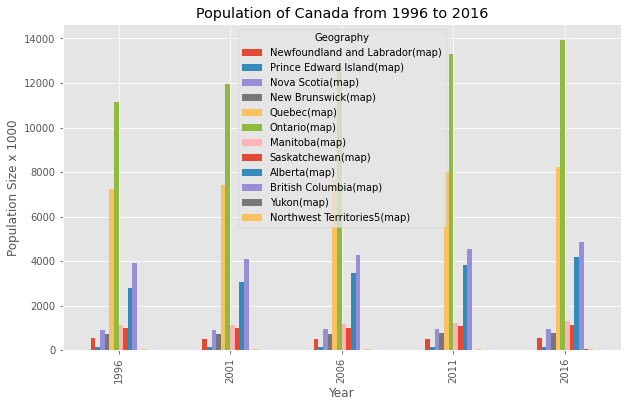

In [28]:
# step 2: plot data
df_population_t2.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Population Size x 1000') # add y-label to the plot
plt.title('Population of Canada from 1996 to 2016') # add title to the plot


plt.show()


From the bar chart, we can see that the four most populous provinces are Ontario, followed by Quebec, British Columbia and Alberta, in order of the highest to the lowest population. It can also be noted that from the year 1996, through to 2016, population growth in these four provinces has been steadily on the incline, while the otherhardly changed at all. The populous areas are likely to be very developed and have little land availbale for farming. We will not rust to conclusions though, but study further.

We create a bar chart to show how much land has been used for farming from 1996 to 2016 per province:
<a id='farmland_size_chart'></a>

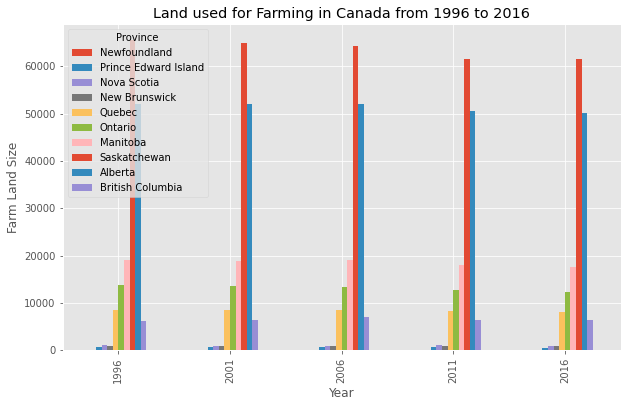

In [29]:
# step 2: plot data
df_farm_area_size_t.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Farm Land Size') # add y-label to the plot
plt.title('Land used for Farming in Canada from 1996 to 2016') # add title to the plot

plt.show()


Looking at this bar chart, we can see that the amount of land used for farming is highest in Saskatchewan, followed by Alberta, Manitoba, Ontario, Quebec and British Columbia in decending order of magnitude. It is clear that Saskatchewan and Alberta have significantly more land dedicated to farming than all the other areas combined. It is also clear that the amount of land being used for farming in Canada is on the decline.

We create a bar chart to show how many farms there have been, per province:
<a id='farm_count_chart'></a>

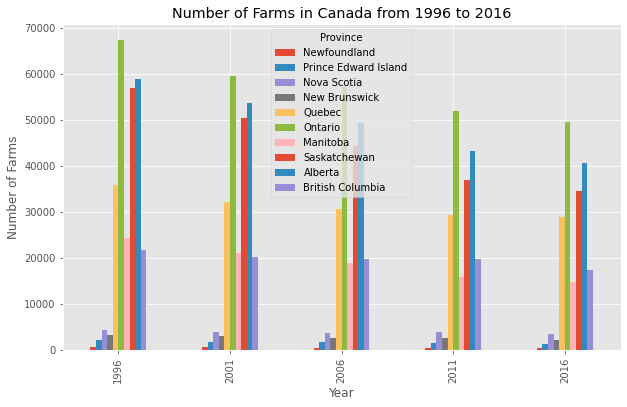

In [30]:
# step 2: plot data
df_farms_count_t.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of Farms') # add y-label to the plot
plt.title('Number of Farms in Canada from 1996 to 2016') # add title to the plot

plt.show()


From the bar chart above, we caan deduce that Ontario has the highest number of farms followed by Alberta, Saskatchewan, Quebec and British Columbia. Considering that the landmass available for farming is low in Ontario, it is likely that farmers would lie to be closer to finanial centers and populous cities, probbly because they are the largest local market or because of the venues found in the areas. 


We create a DataFrame with the Net Income of farms for each province:

In [31]:

data = [df_Newfoundland_Income_t['Realized net income4, 5'],df_Edward_Income_t['Realized net income4, 5'],df_NovaScotia_Income_t['Realized net income4, 5'],df_NewBrunswich_Income_t['Realized net income4, 5'],df_Quebec_Income_t['Realized net income4, 5'],df_Ontario_Income_t['Realized net income4, 5'],df_Manitoba_Income_t['Realized net income4, 5'],df_Asakatchewan_Income_t['Realized net income4, 5'],df_Alberta_Income_t['Realized net income4, 5'],df_BritishColombia_Income_t['Realized net income4, 5']]

In [32]:
headers = ['Newfoundland','Prince Edward Island','Nova Scotia','New Brunswick','Quebec','Ontario','Manitoba','Saskatchewan','Alberta','British Columbia']

In [33]:
df_farms_income = pd.concat(data, axis=1, keys=headers)

In [34]:
df_farms_income_range = df_farms_income.loc[['1996', '2001', '2006','2011','2016'], :]
df_farms_income_range.head(10)

,Newfoundland,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia
1996,9887.0,9887.0,47131.0,24329.0,24329.0,314228.0,192180.0,383686.0,745425.0,78796.0
2001,2399.0,2399.0,30258.0,43480.0,43480.0,527934.0,516062.0,774220.0,796655.0,210390.0
2006,3560.0,3560.0,33849.0,32605.0,32605.0,119619.0,36872.0,420131.0,-161045.0,-25452.0
2011,2307.0,2307.0,29403.0,64679.0,64679.0,1043890.0,463439.0,2479177.0,431524.0,-64931.0
2016,492.0,492.0,12267.0,69662.0,69662.0,1197135.0,500951.0,2878035.0,1524591.0,-35113.0


 
 
 Divide all values by 1000 for the sake of the chart labels:

In [35]:
df_farms_income_range['Newfoundland'] = df_farms_income_range['Newfoundland'].div(1000).round(2)
df_farms_income_range['Prince Edward Island'] = df_farms_income_range['Prince Edward Island'].div(1000).round(2)
df_farms_income_range['Nova Scotia'] = df_farms_income_range['Nova Scotia'].div(1000).round(2)
df_farms_income_range['New Brunswick'] = df_farms_income_range['New Brunswick'].div(1000).round(2)
df_farms_income_range['Quebec'] = df_farms_income_range['Quebec'].div(1000).round(2)
df_farms_income_range['Ontario'] = df_farms_income_range['Ontario'].div(1000).round(2)
df_farms_income_range['Manitoba'] = df_farms_income_range['Manitoba'].div(1000).round(2)
df_farms_income_range['Saskatchewan'] = df_farms_income_range['Saskatchewan'].div(1000).round(2)
df_farms_income_range['Alberta'] = df_farms_income_range['Alberta'].div(1000).round(2)
df_farms_income_range['British Columbia'] = df_farms_income_range['British Columbia'].div(1000).round(2)


We create a bar chart to compare earnings of farms in the provinces:
<a id='farm_income_chart'></a>

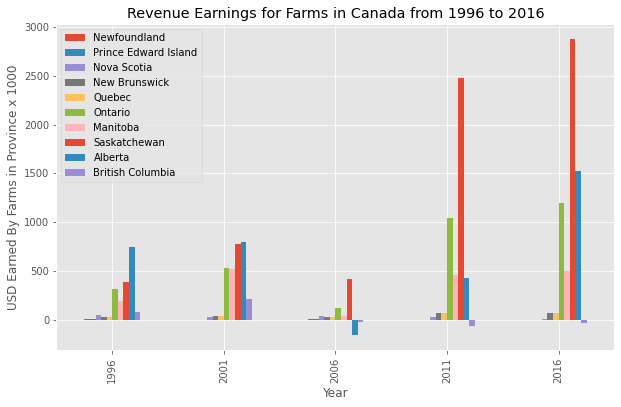

In [36]:
# step 2: plot data
df_farms_income_range.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('USD Earned By Farms in Province x 1000') # add y-label to the plot
plt.title('Revenue Earnings for Farms in Canada from 1996 to 2016') # add title to the plot

plt.show()


In the bar chart above, we explore the net earnings of the farms in the provinces. We can see that with the exception of 2006, farmers have been increasing their net earnings rather quickly. The province that eared the most is Saskatchewan, followed by Albert and Ontario. 

Looking at the data, I would recommend either Saskatchewan or Alberta, with preference for Saskatchewan, as the best province for farming.

We will use Four Square to try to establish what crops or livestock are produced in Saskatchewan.

### SECTION C
<a id='sectionC'></a>

We get a list of the cities in Saskatchewan from Wikipedia:
<a id='saskatchewan_cities'></a>

In [37]:
wikiURL = 'https://en.wikipedia.org/wiki/List_of_cities_in_Saskatchewan'


# Make a GET request to fetch the raw HTML content
html_content2 = requests.get(wikiURL).text

# Parse the html content
soup2 = BeautifulSoup(html_content2, "lxml")



In [38]:
gdp_table2 = soup2.find("table", attrs={"class": "wikitable sortable"})
gdp_table_data2 = gdp_table2.find_all("tr")  # contains 2 rows

# Get all the headings of Lists
headings2 = []
for th in gdp_table_data2[0].find_all("th"):
    # remove any newlines and extra spaces from left and right
    headings2.append(th.text.replace('\n', ' ').strip())
tbl_data2 = []
#tbl_data.append(headings)
for a in range(1, len(gdp_table_data2)-1):
    # Get all the headings of Lists
    tbl_list2 = []
    for td1 in gdp_table_data2[a].find_all("th"):
        # remove any newlines and extra spaces from left and right
    
        tbl_list2.append(td1.div.text.replace('\n', ' ').strip())
        
    for td in gdp_table_data2[a].find_all("td"):
        # remove any newlines and extra spaces from left and right
        col = td.text.replace('\n', ' ').strip()  
        col = col.replace('(part)', '')
        col = col.replace('[SK 1]', '')
        col = col.replace('[SK 4]', '')
        col = col.replace('[SK 7]', '')
        col = col.replace('[SK 8]', '')
        col = col.replace('[SK 9]', '')
        col = col.replace('[SK 10]', '')
        col = col.replace('[SK 11]', '')
        
        tbl_list2.append(col)
    tbl_data2.append(tbl_list2)

towns = []
for town in tbl_data2:
    towns.append(town[0])
    
towns

['Estevan',
 'Flin Flon ',
 'Humboldt',
 'Lloydminster ',
 'Martensville',
 'Meadow Lake',
 'Melfort',
 'Melville',
 'Moose Jaw',
 'North Battleford',
 'Prince Albert',
 'Regina',
 'Saskatoon',
 'Swift Current',
 'Warman',
 'Weyburn',
 'Yorkton']

We use the list of cities generated above, to get geocoordinates and create a dataframe of cities in Saskatchewan with their geocoordinates:

In [39]:
longitudes = []
latitudes = []
addresses = []
for town in towns:
    address = town+', Saskatchewan, Canada'
    
    geolocator = Nominatim(user_agent="saskatchewan_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    longitudes.append(longitude)
    latitudes.append(latitude)
    addresses.append(address)

dict = {'Neighborhood': towns, 'Address': addresses, 'Latitude': latitudes, 'Longitude': longitudes} 

df_saskatchewan_cities = pd.DataFrame(dict) 

df_saskatchewan_cities.head(20)

,Neighborhood,Address,Latitude,Longitude
0,Estevan,"Estevan, Saskatchewan, Canada",49.142808,-102.991075
1,Flin Flon,"Flin Flon , Saskatchewan, Canada",54.799350,-101.880456
2,Humboldt,"Humboldt, Saskatchewan, Canada",52.202071,-105.123109
3,Lloydminster,"Lloydminster , Saskatchewan, Canada",53.310440,-109.974173
4,Martensville,"Martensville, Saskatchewan, Canada",52.291137,-106.663995
5,Meadow Lake,"Meadow Lake, Saskatchewan, Canada",54.130260,-108.435059
6,Melfort,"Melfort, Saskatchewan, Canada",52.861371,-104.613554
7,Melville,"Melville, Saskatchewan, Canada",50.933516,-102.807861
8,Moose Jaw,"Moose Jaw, Saskatchewan, Canada",50.401515,-105.542908
9,North Battleford,"North Battleford, Saskatchewan, Canada",52.776186,-108.300476


We set our Four Square Credentials. Please note that I have removed my Four Square ID and Secrete. The ones below are just placeholders and so you will have to us your own:
<a id='four_square_details'></a>

In [40]:

CLIENT_ID = 'GH973JYW462POWKTGSGWRIJGOOLCC4NMVYHEJFCSF785CVBC' # Please use your Foursquare ID as this one is just a placeholder and so it will not work
CLIENT_SECRET = 'BFJKMSYDWEBY2G11198VNSS764DVHJSJBSYHN3WSCOX45KLHFSE' # Please use your Foursquare Secret as this one is just a placeholder and so it will not work
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30


Create a function to get nearby venues for Neighborhoods in Saskatchewan:
<a id='get_neighborhoods_function'></a>

In [41]:
def getNearbyVenues(names, latitudes, longitudes, radius=15000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Get nearby venues:
<a id='get_neighborhoods'></a>

In [42]:
# type your answer here
saskatchewan_venues = getNearbyVenues(names=df_saskatchewan_cities['Neighborhood'],latitudes=df_saskatchewan_cities['Latitude'],longitudes=df_saskatchewan_cities['Longitude'])

saskatchewan_venues

Estevan
Flin Flon 
Humboldt
Lloydminster 
Martensville
Meadow Lake
Melfort
Melville
Moose Jaw
North Battleford
Prince Albert
Regina
Saskatoon
Swift Current
Warman
Weyburn
Yorkton


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Estevan,49.142808,-102.991075,Taphouse,49.140012,-102.994396,Pub
1,Estevan,49.142808,-102.991075,Eddie Websters,49.131947,-102.973357,Diner
2,Estevan,49.142808,-102.991075,Dairy Queen,49.145213,-102.992811,Ice Cream Shop
3,Estevan,49.142808,-102.991075,A&W,49.142893,-103.000491,Fast Food Restaurant
4,Estevan,49.142808,-102.991075,Tim Hortons,49.133056,-102.974100,Coffee Shop
...,...,...,...,...,...,...,...
305,Yorkton,51.212045,-102.461243,Tim Hortons,51.210414,-102.486822,Coffee Shop
306,Yorkton,51.212045,-102.461243,Tim Hortons,51.209814,-102.451761,Coffee Shop
307,Yorkton,51.212045,-102.461243,Burger King,51.209804,-102.450637,Fast Food Restaurant
308,Yorkton,51.212045,-102.461243,McDonald's,51.209921,-102.469078,Fast Food Restaurant


We count the number of times each venue category appears in the dataframe:
<a id='count_venue_categories'></a>

In [43]:

counts_df = saskatchewan_venues['Venue Category'].value_counts()

counts_df.head(50)

Fast Food Restaurant             41
Coffee Shop                      31
Pizza Place                      19
Ice Cream Shop                   18
Gas Station                      15
Sandwich Place                   15
Restaurant                       13
Grocery Store                    12
Convenience Store                12
Pub                               8
Hotel                             8
Breakfast Spot                    6
Paper / Office Supplies Store     6
Pharmacy                          6
Big Box Store                     5
American Restaurant               5
Hardware Store                    5
Movie Theater                     4
Supermarket                       4
Park                              4
Smoothie Shop                     3
Café                              3
Indian Restaurant                 3
Department Store                  3
Sporting Goods Shop               3
Bakery                            2
Steakhouse                        2
Theater                     

In [44]:
#We get the total number of venues
venues_count = counts_df.sum()

#get the number of venues that can be categorized as eating places
eating_places_count = 41+19+15+13+6+5+3+3+2+2+2+1+1+1+1+1+1+1

#get the percentage of eating places among all other venues in the dataframe
percentage_of_eating_places = (eating_places_count/venues_count)*100

print(percentage_of_eating_places)


38.064516129032256


Looking at the contents of the DataFrame as displayed above, the largest number of venues in Saskatchewan are eating places, making up 38% of the venues retrieved. Eating places need vegetables like onions, tomatoes and lattuce daily. For someone starting out in farming in Saskatchewan, the recommendation for the agricultural products that can be marketed directly to the eating places in Saskatchewan, after which one can increase production and sell to places with higher demand, such as Ontario.
<a id='observation'></a>

In [45]:
# one hot encoding
saskatchewan_onehot = pd.get_dummies(saskatchewan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
saskatchewan_onehot['Neighborhood'] = saskatchewan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [saskatchewan_onehot.columns[-1]] + list(saskatchewan_onehot.columns[:-1])
saskatchewan_onehot = saskatchewan_onehot[fixed_columns]

saskatchewan_onehot.head()

,Neighborhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,Bakery,Bank,Bar,Big Box Store,Bookstore,Breakfast Spot,...,Shopping Mall,Smoothie Shop,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Theater,Vietnamese Restaurant,Wings Joint
0,Estevan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Estevan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Estevan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Estevan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Estevan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
saskatchewan_grouped = saskatchewan_onehot.groupby('Neighborhood').mean().reset_index()
saskatchewan_grouped

,Neighborhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,Bakery,Bank,Bar,Big Box Store,Bookstore,Breakfast Spot,...,Shopping Mall,Smoothie Shop,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Theater,Vietnamese Restaurant,Wings Joint
0,Estevan,0.045455,0.000000,0.000000,0.000000,0.045455,0.00,0.045455,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.0000,0.000000
1,Flin Flon,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
2,Humboldt,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
3,Lloydminster,0.000000,0.033333,0.000000,0.000000,0.000000,0.00,0.033333,0.000000,0.033333,...,0.000000,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.0000,0.000000
4,Martensville,0.062500,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000
5,Meadow Lake,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
6,Melfort,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
7,Melville,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
8,Moose Jaw,0.033333,0.000000,0.000000,0.000000,0.033333,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333,0.000000,0.000000,0.0000,0.033333
9,North Battleford,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.0000,0.000000


Lets view the top 5 venue per neighbourhood:
<a id='observation2'></a>

In [47]:
num_top_venues = 5

for hood in saskatchewan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = saskatchewan_grouped[saskatchewan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Estevan----
                  venue  freq
0  Fast Food Restaurant  0.14
1                   Pub  0.09
2           Pizza Place  0.09
3     Convenience Store  0.09
4           Coffee Shop  0.09


----Flin Flon ----
                     venue  freq
0              Gas Station  0.33
1     Fast Food Restaurant  0.33
2            Big Box Store  0.33
3        Korean Restaurant  0.00
4  New American Restaurant  0.00


----Humboldt----
                  venue  freq
0  Fast Food Restaurant   0.3
1     Convenience Store   0.1
2        Sandwich Place   0.1
3        Ice Cream Shop   0.1
4         Grocery Store   0.1


----Lloydminster ----
                  venue  freq
0  Fast Food Restaurant  0.13
1           Coffee Shop  0.13
2           Gas Station  0.07
3     Convenience Store  0.07
4           Pizza Place  0.07


----Martensville----
                 venue  freq
0       Ice Cream Shop  0.12
1          Coffee Shop  0.12
2          Pizza Place  0.12
3           Restaurant  0.12
4  American Re

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Get 10 most common venues:
<a id='top_ten_most_common_venues'></a>

In [49]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = saskatchewan_grouped['Neighborhood']

for ind in np.arange(saskatchewan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(saskatchewan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Estevan,Fast Food Restaurant,Pub,Convenience Store,Coffee Shop,Pizza Place,American Restaurant,Hotel,Ice Cream Shop,Diner,Clothing Store
1,Flin Flon,Gas Station,Big Box Store,Fast Food Restaurant,Wings Joint,Food Truck,Deli / Bodega,Department Store,Diner,Farmers Market,Food & Drink Shop
2,Humboldt,Fast Food Restaurant,Grocery Store,Convenience Store,Pharmacy,Ice Cream Shop,Pizza Place,Coffee Shop,Sandwich Place,Farmers Market,Deli / Bodega
3,Lloydminster,Coffee Shop,Fast Food Restaurant,Sandwich Place,Convenience Store,Gas Station,Pizza Place,Grocery Store,Pharmacy,Arts & Crafts Store,Department Store
4,Martensville,Ice Cream Shop,Pizza Place,Restaurant,Coffee Shop,American Restaurant,Karaoke Bar,Park,Fast Food Restaurant,Sandwich Place,Hotel


In [50]:

# set number of clusters
kclusters = 3

saskatchewan_grouped_clustering = saskatchewan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(saskatchewan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 0, 0, 0, 2, 0, 0, 0, 0])

Add Cluster labels to dataframe:
<a id='add_cluster_labels_to_dataframe'></a>

In [51]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

saskatchewan_merged = df_saskatchewan_cities

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
saskatchewan_merged = saskatchewan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

saskatchewan_merged.head() # check the last columns!

,Neighborhood,Address,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Estevan,"Estevan, Saskatchewan, Canada",49.142808,-102.991075,0,Fast Food Restaurant,Pub,Convenience Store,Coffee Shop,Pizza Place,American Restaurant,Hotel,Ice Cream Shop,Diner,Clothing Store
1,Flin Flon,"Flin Flon , Saskatchewan, Canada",54.799350,-101.880456,1,Gas Station,Big Box Store,Fast Food Restaurant,Wings Joint,Food Truck,Deli / Bodega,Department Store,Diner,Farmers Market,Food & Drink Shop
2,Humboldt,"Humboldt, Saskatchewan, Canada",52.202071,-105.123109,0,Fast Food Restaurant,Grocery Store,Convenience Store,Pharmacy,Ice Cream Shop,Pizza Place,Coffee Shop,Sandwich Place,Farmers Market,Deli / Bodega
3,Lloydminster,"Lloydminster , Saskatchewan, Canada",53.310440,-109.974173,0,Coffee Shop,Fast Food Restaurant,Sandwich Place,Convenience Store,Gas Station,Pizza Place,Grocery Store,Pharmacy,Arts & Crafts Store,Department Store
4,Martensville,"Martensville, Saskatchewan, Canada",52.291137,-106.663995,0,Ice Cream Shop,Pizza Place,Restaurant,Coffee Shop,American Restaurant,Karaoke Bar,Park,Fast Food Restaurant,Sandwich Place,Hotel


View the clusters on a map:
<a id='view_clusters_on_map'></a>

In [52]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(saskatchewan_merged['Latitude'], saskatchewan_merged['Longitude'], saskatchewan_merged['Neighborhood'], saskatchewan_merged['Cluster Labels']):
    if math.isnan(cluster):
        pass
    else:
        if isinstance(cluster, int):
            label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
            folium.CircleMarker(
                [lat, lon],
                radius=5,
                popup=label,
                color=rainbow[cluster-1],
                fill=True,
                fill_color=rainbow[cluster-1],
                fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

View venues in clusters:
<a id='view_venues_in_clusters'></a>

In [53]:
saskatchewan_merged.loc[saskatchewan_merged['Cluster Labels'] == 0, saskatchewan_merged.columns[[1] + list(range(5, saskatchewan_merged.shape[1]))]]

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Estevan, Saskatchewan, Canada",Fast Food Restaurant,Pub,Convenience Store,Coffee Shop,Pizza Place,American Restaurant,Hotel,Ice Cream Shop,Diner,Clothing Store
2,"Humboldt, Saskatchewan, Canada",Fast Food Restaurant,Grocery Store,Convenience Store,Pharmacy,Ice Cream Shop,Pizza Place,Coffee Shop,Sandwich Place,Farmers Market,Deli / Bodega
3,"Lloydminster , Saskatchewan, Canada",Coffee Shop,Fast Food Restaurant,Sandwich Place,Convenience Store,Gas Station,Pizza Place,Grocery Store,Pharmacy,Arts & Crafts Store,Department Store
4,"Martensville, Saskatchewan, Canada",Ice Cream Shop,Pizza Place,Restaurant,Coffee Shop,American Restaurant,Karaoke Bar,Park,Fast Food Restaurant,Sandwich Place,Hotel
6,"Melfort, Saskatchewan, Canada",Coffee Shop,Fast Food Restaurant,Grocery Store,Hotel,Ice Cream Shop,Pizza Place,Convenience Store,Deli / Bodega,Department Store,Diner
7,"Melville, Saskatchewan, Canada",Grocery Store,Fast Food Restaurant,Hotel,Ice Cream Shop,Coffee Shop,Bank,Bar,Greek Restaurant,Gluten-free Restaurant,Arts & Crafts Store
8,"Moose Jaw, Saskatchewan, Canada",Coffee Shop,Fast Food Restaurant,Grocery Store,Ice Cream Shop,Movie Theater,Sandwich Place,Restaurant,Pub,Pizza Place,Wings Joint
9,"North Battleford, Saskatchewan, Canada",Fast Food Restaurant,Coffee Shop,Sandwich Place,Pizza Place,Hardware Store,Gas Station,Ice Cream Shop,Convenience Store,Paper / Office Supplies Store,Pharmacy
10,"Prince Albert, Saskatchewan, Canada",Fast Food Restaurant,Gas Station,Coffee Shop,Grocery Store,Sandwich Place,Restaurant,Ice Cream Shop,Hardware Store,Paper / Office Supplies Store,Arts & Crafts Store
11,"Regina, Saskatchewan, Canada",Restaurant,Café,Park,Brewery,Breakfast Spot,Deli / Bodega,Coffee Shop,Korean Restaurant,Italian Restaurant,Hardware Store


In [54]:
saskatchewan_merged.loc[saskatchewan_merged['Cluster Labels'] == 1, saskatchewan_merged.columns[[1] + list(range(5, saskatchewan_merged.shape[1]))]]

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Flin Flon , Saskatchewan, Canada",Gas Station,Big Box Store,Fast Food Restaurant,Wings Joint,Food Truck,Deli / Bodega,Department Store,Diner,Farmers Market,Food & Drink Shop


In [55]:
saskatchewan_merged.loc[saskatchewan_merged['Cluster Labels'] == 2, saskatchewan_merged.columns[[1] + list(range(5, saskatchewan_merged.shape[1]))]]

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,"Meadow Lake, Saskatchewan, Canada",Fast Food Restaurant,Convenience Store,Motel,Wings Joint,Gym / Fitness Center,Deli / Bodega,Department Store,Diner,Farmers Market,Food & Drink Shop


### CONCLUSION
<a id='conclusion'></a>

As a recommendation, based on the high number of eating places, starting a farm that focuses on supplying the needs of the eating places would be going for the low hanging fruit. In terms of location for the farm, focusing on a place that is central to the clusters wuold be advised to reduce on transportation costs.